# Just operation policies

In [1]:
from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Constant, Scenario, Constraint,optimize)

import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from AMG_function import AMG_model_function, AMG_model_function_int
from functions_data import full_dataframe
from AMG_drought_indicator import get_drought_state

#testing the model function
outcomes = AMG_model_function(chapala_flow= 7.1, calderon_lared_flow= 0, pozos_flow= 2.2, toluquilla_flow= 0.4, 
                aqp1_PP2_to_PP3=0.2, aqp2_PP3_to_Pozos=-0.71, aqp3_Pozos_to_Toluquilla=-0.6, aqp4_Toluquilla_to_PP1=-0.6,
                rounding_outcomes=2,
                rounding_levers=2)
print(outcomes)

{'delivered_PP1': 5.751, 'delivered_PP2': 1.349, 'delivered_PP3': 0, 'delivered_Pozos': 2.2, 'delivered_Toluquilla': 0.4, 'demand_PP1': 2.932923333333333, 'demand_PP2': 0.7571686458333333, 'demand_PP3': 0.9435108680555555, 'demand_Toluquilla': 0.782294375, 'demand_Pozos': 1.2014250347222222, 'supplied_PP1': 2.6693019600000003, 'supplied_PP2': 0.6854705, 'supplied_PP3': 0.8775000000000001, 'supplied_Toluquilla': 0.68757754, 'supplied_Pozos': 1.0439000000000003, 'total_supplied': 5.963750000000001, 'supplied_demand_PP1': 0.9101165140127543, 'supplied_demand_PP2': 0.9053075609669191, 'supplied_demand_PP3': 0.9300369817768028, 'supplied_demand_Toluquilla': 0.8789243051888237, 'supplied_demand_Pozos': 0.8688848407769005, 'supplied_demand_deficit_PP1': 0.08988348598724571, 'supplied_demand_deficit_PP2': 0.09469243903308089, 'supplied_demand_deficit_PP3': 0.06996301822319717, 'supplied_demand_deficit_Toluquilla': 0.1210756948111763, 'supplied_demand_deficit_Pozos': 0.13111515922309946, 'suppl

Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
1082it [00:06, 165.37it/s]                                                     
[MainProcess/INFO] optimization completed, found 185 solutions
[MainProcess/INFO] terminating pool


HIGH
Compromise index = 106


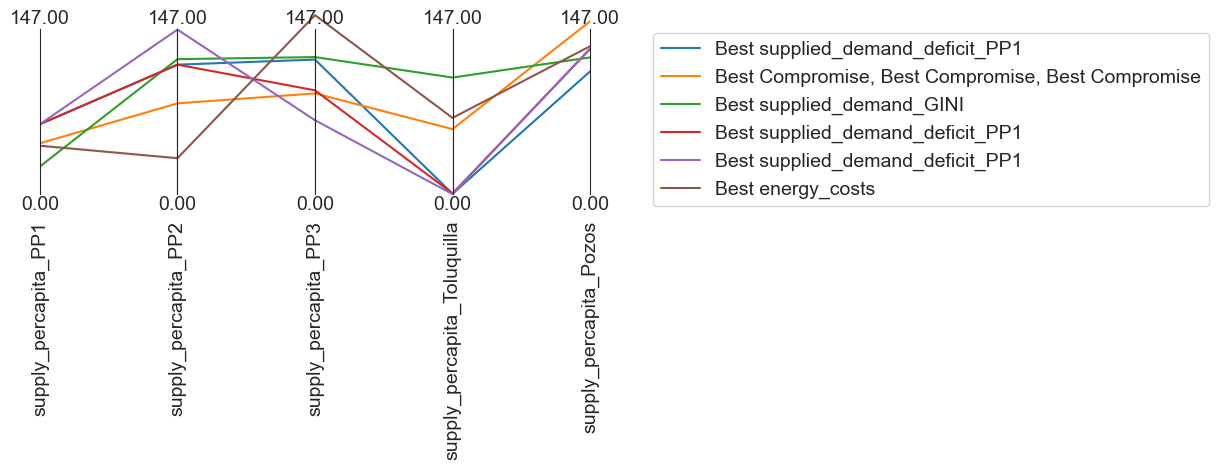

In [2]:
from AMG_optimization import run_optimization

#Problem formulation
performance_outcomes = {"supplied_demand_deficit":True,
                          "supplied_demand":False,
                          "supply_percapita":False}

justice_outcomes = {"supplied_demand_GINI":False,
                      "supply_percapita_GINI":False,
                      "supply_percapita_average":False,
                      "ZAs_below_142":False,
                      "ZAs_below_128":False,
                      "ZAs_below_100":False,
                      "ZAs_below_50":False}

other_outcomes = {"energy_costs":True}


#Model Parameters
n_nfe = 1000
epsilon = 0.04
seed = 1

#Scenario setting

scenario_adhocr = {"name":"adhoc",'chapala_flow' : 6.9, 'calderon_lared_flow' : 1, 'pozos_flow' : 2.3, 'toluquilla_flow' : 0.5}

representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

scenario_name = "chapala_incident"
scenario = representative_scenarios_df.loc[scenario_name,:].to_dict()


all_outcomes = {**performance_outcomes, **justice_outcomes, **other_outcomes}
experiment_name = "DST"


results  = run_optimization(experiment_name=experiment_name, 
                 outcomes= all_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario, scenario_name=scenario_name,model_function= AMG_model_function,
                 restriction = True)

full_results_df = full_dataframe(results,scenarios_in_dataframe=False, scenario = scenario)

print(get_drought_state(scenario))


from functions_data import find_best_policies_for_specified_objectives
from functions_viz import visualize_best_policies

# Example usage
objectives_dict = {
    'supplied_demand_deficit_PP1': False,
    'supplied_demand_deficit_PP2': False,
    'supplied_demand_deficit_PP3': True,
    'supplied_demand_deficit_Toluquilla': False,
    'supplied_demand_deficit_Pozos': False,
    'supplied_demand_GINI': True,
    'supply_percapita_GINI': False,
    'energy_costs': True,
    'supplied_demand_PP1': False,
    'supplied_demand_PP2': False,
    'supplied_demand_PP3': False,
    'supplied_demand_Toluquilla': False,
    'supplied_demand_Pozos': False,
    'supply_percapita_average': False
}



best_policies_df = find_best_policies_for_specified_objectives(full_results_df, objectives_dict)


visualize_best_policies(best_policies_df, objectives_dict)



Compromise index = 106


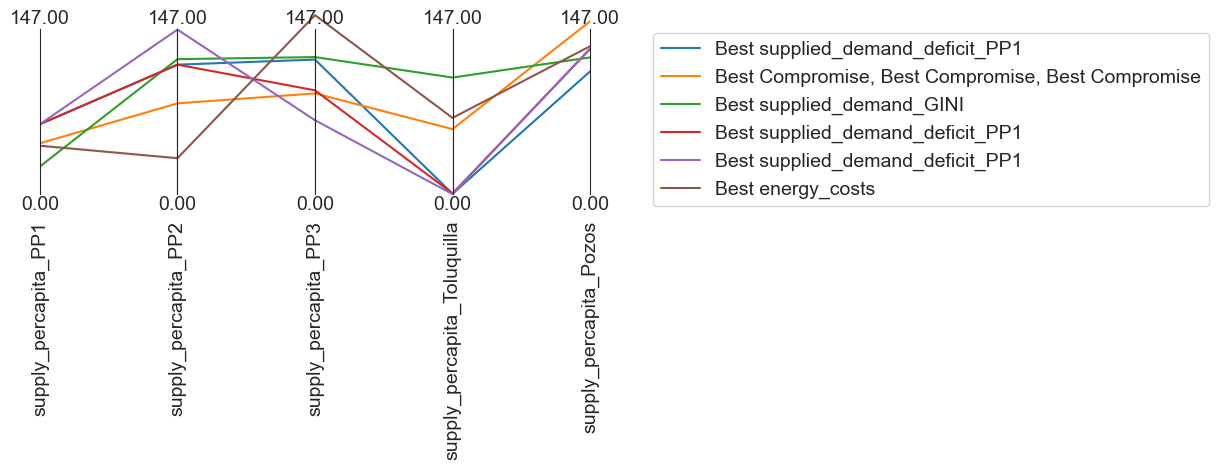

In [3]:
from functions_data import find_best_policies_for_specified_objectives
from functions_viz import visualize_best_policies

# Example usage
objectives_dict = {
    'supplied_demand_deficit_PP1': True,
    'supplied_demand_deficit_PP2': False,
    'supplied_demand_deficit_PP3': False,
    'supplied_demand_deficit_Toluquilla': False,
    'supplied_demand_deficit_Pozos': False,
    'supplied_demand_GINI': True,
    'supply_percapita_GINI': False,
    'energy_costs': True,
    'supplied_demand_PP1': False,
    'supplied_demand_PP2': False,
    'supplied_demand_PP3': False,
    'supplied_demand_Toluquilla': False,
    'supplied_demand_Pozos': False,
    'supply_percapita_average': False
}

scenario_name = "chapala_incident"
seed = 1  # Example seed value
epsilon = 0.04  # Example epsilon value
n_nfe = 20000  # Example nfe value


best_policies_df = find_best_policies_for_specified_objectives(full_results_df, objectives_dict)


visualize_best_policies(best_policies_df, objectives_dict)